In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

import os

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# set the working directory

indir = "/Volumes/data/data/seaflow/refilter/"
cruises = [x for x in os.listdir(indir)] # if os.path.isdir(x)]
print cruises
print len(cruises)

['CMOP_3', 'DeepDOM', 'KiloMoana_1', 'MBARI_1', 'MBARI_2', 'MBARI_3', 'MV1405', 'SCOPE_1', 'SCOPE_10', 'SCOPE_11', 'SCOPE_12', 'SCOPE_13', 'SCOPE_14', 'SCOPE_15', 'SCOPE_16', 'SCOPE_2', 'SCOPE_3', 'SCOPE_4', 'SCOPE_5', 'SCOPE_6', 'Thompson_0', 'Thompson_1', 'Thompson_10', 'Thompson_11', 'Thompson_12', 'Thompson_4', 'Thompson_5', 'Thompson_7', 'Thompson_8', 'Thompson_9', 'Tokyo_1', 'Tokyo_2', 'Tokyo_3', 'Tokyo_4']
34


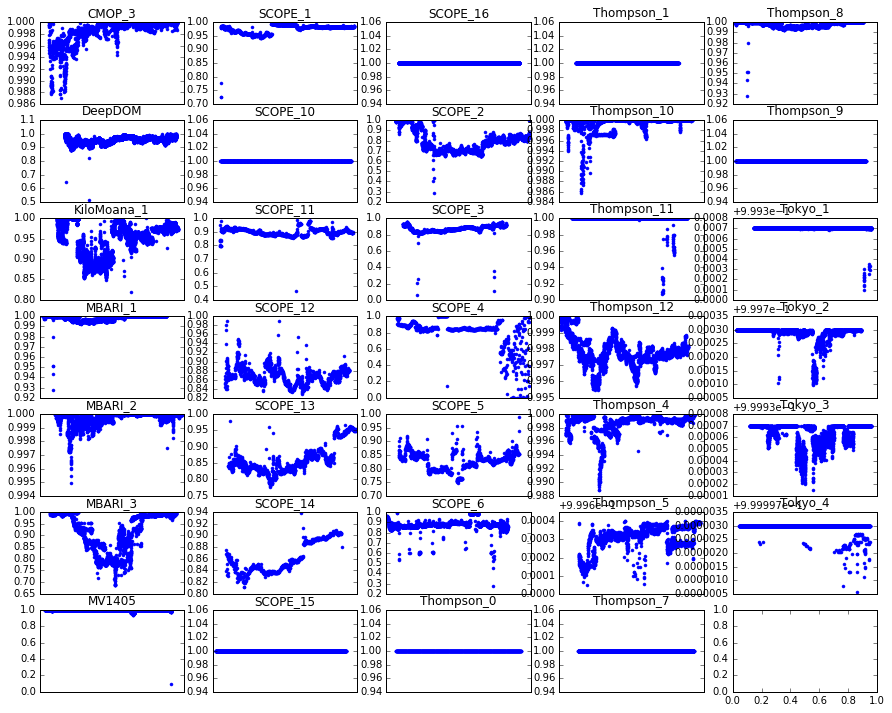

In [3]:
f1, axarr = plt.subplots(7,5 , figsize=(15, 12), dpi = 600)

p = 0
m = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,3,3,3,3,3,3,4,4,4,4,4,4,4]
n = [0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6]
for c in cruises:
    x = n[p]
    y = m[p]

    # open the sqlite db
    dbfile = '%s%s/%s.db' % (indir, c, c)

    db = sqlite3.connect(dbfile)
    filt = pd.read_sql_query("SELECT * from filter", db)

    # find the newest filter id
    filtid = filt['id'][1]

    opp = pd.read_sql_query("SELECT * from opp", db)
    opp = opp.loc[opp['filter_id']== filtid]
    
    axarr[x,y].plot(opp['evt_count']/opp['all_count'],'.', lw =0)
    axarr[x,y].set_title(c)
    
    
    axarr[x,y].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    p += 1

    
plt.show()

f1.savefig('evt_total_ratio.png', dpi = 600)

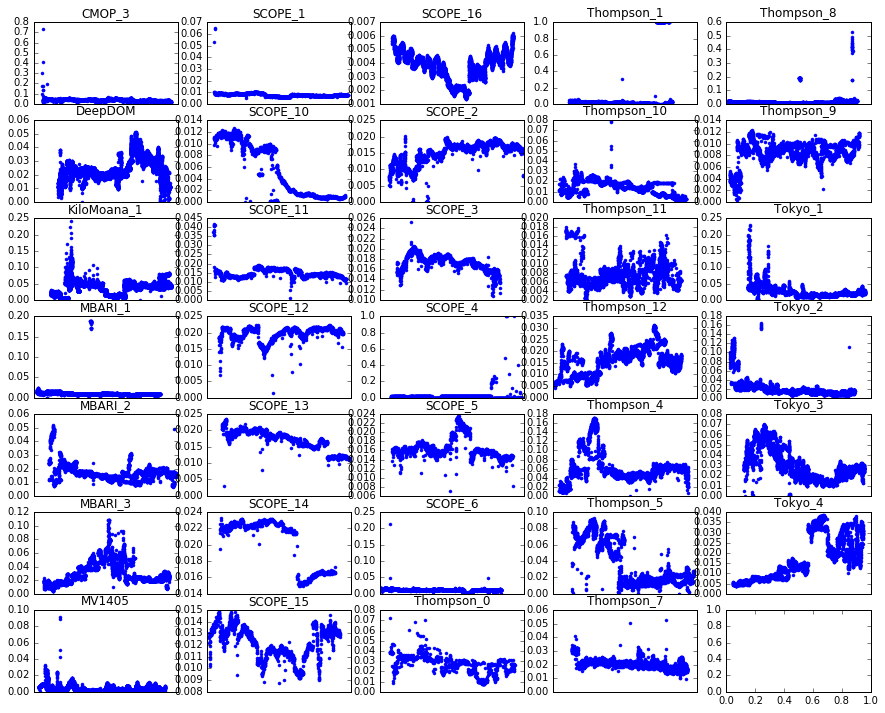

In [4]:
f2, axarr = plt.subplots(7,5 ,  figsize=(15, 12), dpi = 600)

p = 0
m = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,3,3,3,3,3,3,4,4,4,4,4,4,4]
n = [0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6]
for c in cruises:
    x = n[p]
    y = m[p]

    # open the sqlite db
    dbfile = '%s%s/%s.db' % (indir, c, c)

    db = sqlite3.connect(dbfile)
    filt = pd.read_sql_query("SELECT * from filter", db)

    # find the newest filter id
    filtid = filt['id'][1]

    opp = pd.read_sql_query("SELECT * from opp", db)
    opp = opp.loc[opp['filter_id']== filtid]
    
    axarr[x,y].plot(opp['opp_count']/opp['evt_count'],'.', lw =0)
    axarr[x,y].set_title(c)
    
    
    axarr[x,y].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    p += 1

    
plt.show()

f2.savefig('opp_evt_ratio.png', dpi = 600)

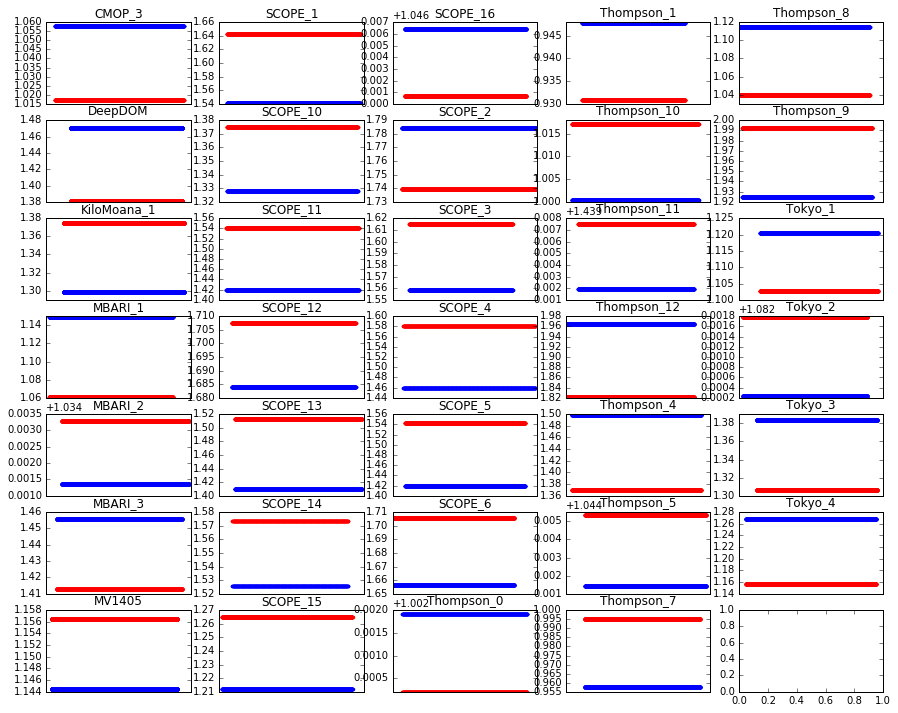

In [8]:
f3, axarr = plt.subplots(7,5 , figsize=(15, 12), dpi = 600)

p = 0
m = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3,3,3,3,3,3,3,4,4,4,4,4,4,4]
n = [0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6]
for c in cruises:
    x = n[p]
    y = m[p]

    # open the sqlite db
    dbfile = '%s%s/%s.db' % (indir, c, c)

    db = sqlite3.connect(dbfile)
    filt = pd.read_sql_query("SELECT * from filter", db)

    # find the newest filter id
    filtid1 = filt['id'][0]
    filtid2 = filt['id'][1]

    opp = pd.read_sql_query("SELECT * from opp", db)
    opp = opp.loc[opp['filter_id']== filtid2]
    
    axarr[x,y].plot(opp['notch1'],'.r', lw =0,)
    axarr[x,y].plot(opp['notch2'],'.b', lw =0,)
    axarr[x,y].set_title(c)
    
    
    axarr[x,y].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    p += 1

    
plt.show()

f3.savefig('notch_fid2.png', dpi = 600)